## CAR PRICE ANALYSIS

In [69]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler 

In [39]:
df = pd.read_csv("F:\\project college\\car_price\\CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [40]:
df.shape

(205, 26)

In [41]:
"""The info() method prints information about the DataFrame. 
The information contains the number of columns, 
column labels, column data types, memory usage, range index, and 
the number of cells in each column (non-null values)."""

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [42]:
''' describe() is used to view some basic statistical details 
like percentile, mean, std, etc. of a data frame or a series of numeric values.
'''

df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# DATA CLEANING START

In [43]:
'''The value 0 represent that the entire dataset does not contain any null values.'''

df.isna().sum().sum()


0

In [44]:
df.isnull().sum() # It check for the null values column wise 

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [45]:
df.isnull().sum(axis = 1) # It check for null values row wise

0      0
1      0
2      0
3      0
4      0
      ..
200    0
201    0
202    0
203    0
204    0
Length: 205, dtype: int64

# DATA PREPARATION 

In [46]:
df.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [47]:
"""
The CarName column in the dataset represent the company of the car followed by the model name of the car. 
We are interested only in the company of that car. Hence we the to transform the data values of that column.
"""
carcompany = []
for model in df['CarName']:
    carcompany.append(str(model.split(' ')[0]))

df['carcompany'] = np.array(carcompany) # Creating a new column for the company name 

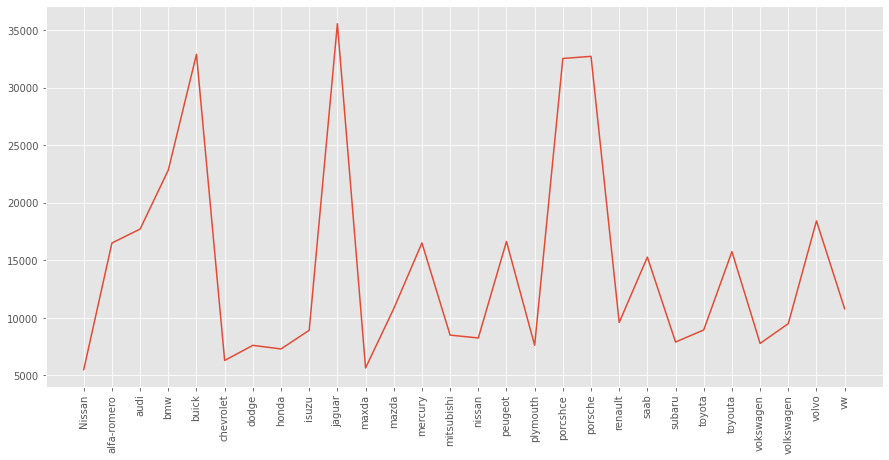

In [48]:
with plt.style.context(('ggplot')):
    plt.figure(figsize=(15,7))
    plt.plot(df.groupby(['carcompany']).median()['price'])
    plt.xticks(rotation = 90)
    plt.show()

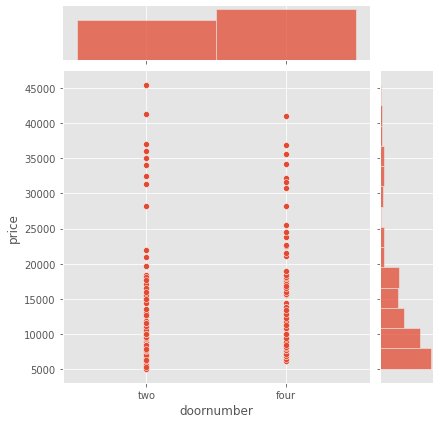

In [49]:
with plt.style.context(('ggplot')):
    sns.jointplot(x = df["doornumber"], y = df["price"], data = df)

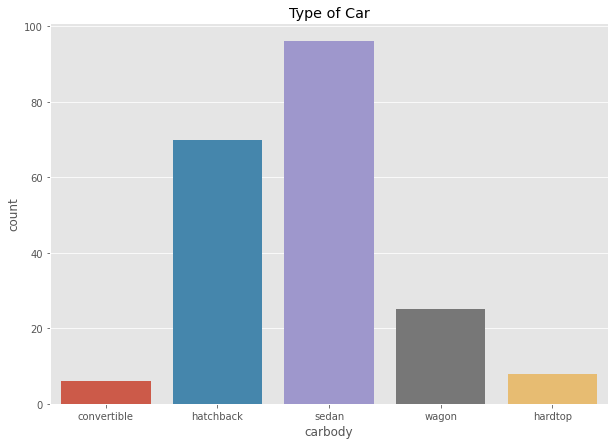

In [50]:
with plt.style.context(('ggplot')):
    plt.figure(figsize = (10,7))
    plt.title("Type of Car")
    sns.countplot(data = df, x = df['carbody'])
    plt.show()

In [51]:
df.carcompany = df.carcompany.astype('category').cat.codes
df.CarName = df.CarName.astype('category').cat.codes
df.fueltype = df.fueltype.astype('category').cat.codes
df.aspiration = df.aspiration.astype('category').cat.codes
df.doornumber = df.doornumber.astype('category').cat.codes
df.carbody = df.carbody.astype('category').cat.codes
df.drivewheel = df.drivewheel.astype('category').cat.codes
df.enginelocation = df.enginelocation.astype('category').cat.codes
df.enginetype = df.enginetype.astype('category').cat.codes
df.cylindernumber = df.cylindernumber.astype('category').cat.codes
df.fuelsystem = df.fuelsystem.astype('category').cat.codes

In [52]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carcompany
0,1,3,2,1,0,1,0,2,0,88.6,...,5,3.47,2.68,9.0,111,5000,21,27,13495.0,1
1,2,3,3,1,0,1,0,2,0,88.6,...,5,3.47,2.68,9.0,111,5000,21,27,16500.0,1
2,3,1,1,1,0,1,2,2,0,94.5,...,5,2.68,3.47,9.0,154,5000,19,26,16500.0,1
3,4,2,4,1,0,0,3,1,0,99.8,...,5,3.19,3.40,10.0,102,5500,24,30,13950.0,2
4,5,2,5,1,0,0,3,0,0,99.4,...,5,3.19,3.40,8.0,115,5500,18,22,17450.0,2


In [53]:
df = df.drop(['car_ID'], axis = 1)
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'carcompany'],
      dtype='object')

In [54]:
df.corr()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carcompany
symboling,1.000000,-0.107095,0.194311,-0.059866,0.664073,-0.596135,-0.041671,0.212471,-0.531954,-0.357612,...,0.091163,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978,-0.091524
CarName,-0.107095,1.000000,-0.069435,0.019914,-0.171745,0.099691,-0.016129,0.055968,0.014550,0.053016,...,0.123845,0.188598,-0.181775,0.101730,-0.092131,-0.138309,0.093437,0.102895,-0.231439,0.995209
fueltype,0.194311,-0.069435,1.000000,-0.401397,0.191491,-0.147853,-0.132257,0.040070,-0.308346,-0.212679,...,0.041529,-0.054451,-0.241829,-0.984356,0.163926,0.476883,-0.255963,-0.191392,-0.105679,-0.063029
aspiration,-0.059866,0.019914,-0.401397,1.000000,-0.031792,0.063028,0.066465,-0.057191,0.257611,0.234539,...,0.288086,0.212614,0.222982,0.295541,0.241685,-0.183383,-0.202362,-0.254416,0.177926,0.021522
doornumber,0.664073,-0.171745,0.191491,-0.031792,1.000000,-0.680358,0.098954,0.137757,-0.447357,-0.398568,...,0.015519,-0.119258,0.011082,-0.177888,0.126947,0.247668,0.012417,0.036330,-0.031835,-0.164705
carbody,-0.596135,0.099691,-0.147853,0.063028,-0.680358,1.000000,-0.155745,-0.277009,0.401362,0.334433,...,-0.065079,0.010549,-0.015325,0.136243,-0.153928,-0.109643,0.031697,-0.007170,-0.083976,0.096025
drivewheel,-0.041671,-0.016129,-0.132257,0.066465,0.098954,-0.155745,1.000000,0.147865,0.459745,0.485649,...,0.424686,0.481827,0.071591,0.127479,0.518686,-0.039417,-0.449581,-0.452220,0.577992,-0.041645
enginelocation,0.212471,0.055968,0.040070,-0.057191,0.137757,-0.277009,0.147865,1.000000,-0.187790,-0.050989,...,0.105971,0.185042,-0.138455,-0.019762,0.317839,0.198461,-0.153487,-0.102026,0.324973,0.052188
wheelbase,-0.531954,0.014550,-0.308346,0.257611,-0.447357,0.401362,0.459745,-0.187790,1.000000,0.874587,...,0.384601,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816,0.006009
carlength,-0.357612,0.053016,-0.212679,0.234539,-0.398568,0.334433,0.485649,-0.050989,0.874587,1.000000,...,0.557810,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920,0.053227


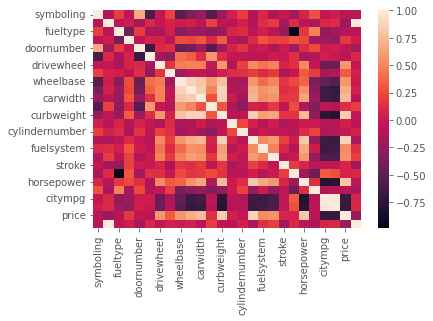

In [55]:
with plt.style.context(('ggplot')):
    sns.heatmap(df.corr(), annot = False)

In [61]:
def findCorrelation(df):
    corr_mtx = np.array(df.corr())
    corr_mtx = np.triu(corr_mtx, 0)
    for i in range(df.shape[1]):
        for j in range(df.shape[1]):
            if (np.abs(corr_mtx[i][j]) >= 0.85 and np.abs(corr_mtx[i][j]) < 1 and i != j):
                print(f"{df.columns[i]} <---CORELATED---> {df.columns[j]} by----> {corr_mtx[i][j]}")
findCorrelation(df)           

CarName <---CORELATED---> carcompany by----> 0.9952093509027162
fueltype <---CORELATED---> compressionratio by----> -0.9843560568767542
wheelbase <---CORELATED---> carlength by----> 0.8745874759642636
carlength <---CORELATED---> curbweight by----> 0.8777284608306424
carwidth <---CORELATED---> curbweight by----> 0.8670324646791238
curbweight <---CORELATED---> enginesize by----> 0.8505940734262774
enginesize <---CORELATED---> price by----> 0.8741448025245111
citympg <---CORELATED---> highwaympg by----> 0.9713370423425051


In [62]:
df.drop(['CarName','fueltype','wheelbase','carlength','carwidth','curbweight','enginesize','citympg'], axis = 1, inplace = True)

In [63]:
df.dtypes

symboling             int64
aspiration             int8
doornumber             int8
carbody                int8
drivewheel             int8
enginelocation         int8
carheight           float64
enginetype             int8
cylindernumber         int8
fuelsystem             int8
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
highwaympg            int64
price               float64
carcompany             int8
dtype: object

# MODEL BUILDING

In [64]:
y = df["price"]
x = df.drop(["price"], axis = 1)

In [65]:
x_train,x_test,y_train,ty_test = train_test_split(x,y,train_size = 0.8)

In [66]:
x_train.head()

,symboling,aspiration,doornumber,carbody,drivewheel,enginelocation,carheight,enginetype,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,carcompany
37,0,0,1,2,1,0,53.3,3,2,0,3.15,3.58,9.0,86,5800,33,7
172,2,0,1,0,2,0,53.0,3,2,5,3.62,3.50,9.3,116,4800,30,22
196,-2,0,0,3,2,0,56.2,3,2,5,3.78,3.15,9.5,114,5400,28,26
86,1,0,0,3,1,0,51.6,3,2,1,3.35,3.46,8.5,88,5000,32,13
102,0,0,0,4,1,0,56.1,5,3,5,3.43,3.27,9.0,152,5200,22,14


In [76]:
def accuracy_check(x_val, y_val,split = 0.8):
    sc = StandardScaler()
    x_train, x_test, y_train,y_test = train_test_split(x_val, y_val, train_size = split)
    x_train_scaled = sc.fit_transform(x_train)
    x_test_scaled = sc.fit_transform(x_test)

    model1 = LinearRegression()
    model1.fit(x_train, y_train)

    model2 = LinearRegression()
    model2.fit(x_train_scaled,y_train)

    y_pred = model1.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))

    accuracy1 = model1.score(x_test, y_test)

    y_pred1 = model2.predict(x_test_scaled)
    rmse1 = np.sqrt(mean_squared_error(y_test,y_pred1))

    accuracy2 = model2.score(x_test_scaled,y_test)

    return rmse,accuracy1,rmse1,accuracy2
    

In [77]:
for i in range(10):
    rmse,ac1,rmse2,ac2 = accuracy_check(x,y,split = 0.85)
    print("Rmse(Unscaled) :",rmse,"\t","Accuracy(Unscaled) :",ac1,"Rmse(Scaled) :",rmse2,"Accuracy(Scaled) :",ac2)

Rmse(Unscaled) : 3360.42137817258 	 Accuracy(Unscaled) : 0.7905318045150549 Rmse(Scaled) : 3642.4374990839196 Accuracy(Scaled) : 0.7538981772202782
Rmse(Unscaled) : 4216.749017298521 	 Accuracy(Unscaled) : 0.8044080920789582 Rmse(Scaled) : 4068.857762819285 Accuracy(Scaled) : 0.8178872322544676
Rmse(Unscaled) : 3483.4249253479843 	 Accuracy(Unscaled) : 0.732396727553298 Rmse(Scaled) : 4254.838202597955 Accuracy(Scaled) : 0.6007502896279664
Rmse(Unscaled) : 4004.783063964971 	 Accuracy(Unscaled) : 0.6639431324663824 Rmse(Scaled) : 3518.875407401126 Accuracy(Scaled) : 0.7405446897838645
Rmse(Unscaled) : 2886.8606752856585 	 Accuracy(Unscaled) : 0.8860131890838852 Rmse(Scaled) : 2977.059005131148 Accuracy(Scaled) : 0.878779006543769
Rmse(Unscaled) : 3882.3357445055813 	 Accuracy(Unscaled) : 0.8490903845971409 Rmse(Scaled) : 3598.6263456567117 Accuracy(Scaled) : 0.8703405301371908
Rmse(Unscaled) : 2244.4640164851867 	 Accuracy(Unscaled) : 0.8530401796701459 Rmse(Scaled) : 2579.730901937801

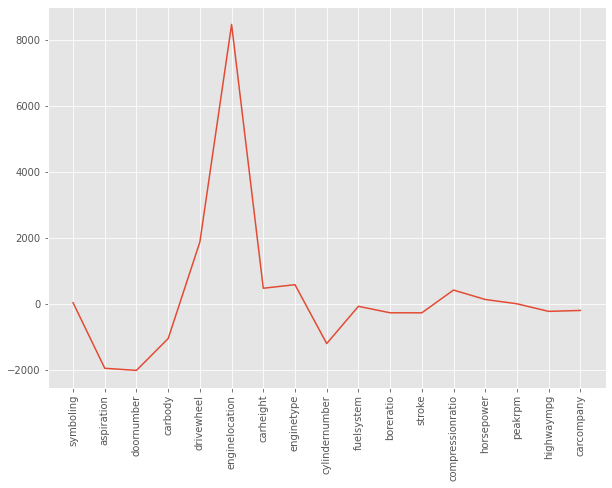

In [85]:
#model = LinearRegression()
#model.fit(x_train, y_train)
with plt.style.context(('ggplot')):
    plt.figure(figsize = (10,7))
    plt.plot(x.columns, model.coef_)
    plt.xticks(rotation = 90)
    plt.show()

"""
From the below graph we can clearly state that ENGINELOCATION
effect the most in the model and ASPIRATION and DOORNUMBER effect the least. 
"""